In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 24.8 MB/s eta 0:00:00


In [24]:
import ultralytics as ul
from ultralytics import YOLO as yl

In [3]:
ul.checks()

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kOsHQhXjfibkaxKNz7Kg")
project = rf.workspace("z-im-8uw9v").project("face-shape-dxwly")
dataset = project.version(1).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=ffd7364e1e5a5710db2ca9793433b250bd26141e244bdf02ed0901ead3dea1b4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.124, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to face-shape-1 in yolov8:: 100%|██████████| 2870/2870 [00:00<00:00, 3209.97it/s]


In [6]:
model = yl('/content/yolov8s.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='/content/face-shape-1/data.yaml', epochs=100)  # train the model

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8s.pt, data=/content/face-shape-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

In [9]:
import pandas as pd

df = pd.read_csv('../project-data/shape_results/results.csv')
df.head()

epoch           train/box_loss           train/cls_loss  \
0                        0                  1.08830                   2.2318   
1                        1                  1.00640                   1.5205   
2                        2                  1.01520                   1.4445   
3                        3                  1.00010                   1.4236   
4                        4                  0.98541                   1.3751   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.5520                  0.52468                  0.56303   
1                   1.4119                  0.25409                  0.77280   
2                   1.4111                  0.17464                  0.68212   
3                   1.4030                  0.24176                  0.73375   
4                   1.3967                  0.50485                  0.64339   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.34925                  0.22801                  1.15760   
1                  0.31635                  0.19838                  1.19380   
2                  0.31001                  0.18300                  1.29270   
3                  0.33802                  0.21503                  1.13490   
4                  0.36158                  0.26196                  0.97734   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   1.8753                   2.0116                 0.000411   
1                   1.6882                   1.8637                 0.000819   
2                   1.7426                   1.9439                 0.001220   
3                   1.7807                   1.7771                 0.001213   
4                   1.3249                   1.6368                 0.001213   

                    lr/pg1                   lr/pg2  
0                 0.000411                 0.000411  
1                 0.000819                 0.000819  
2                 0.001220                 0.001220  
3                 0.001213                 0.001213  
4                 0.001213                 0.001213

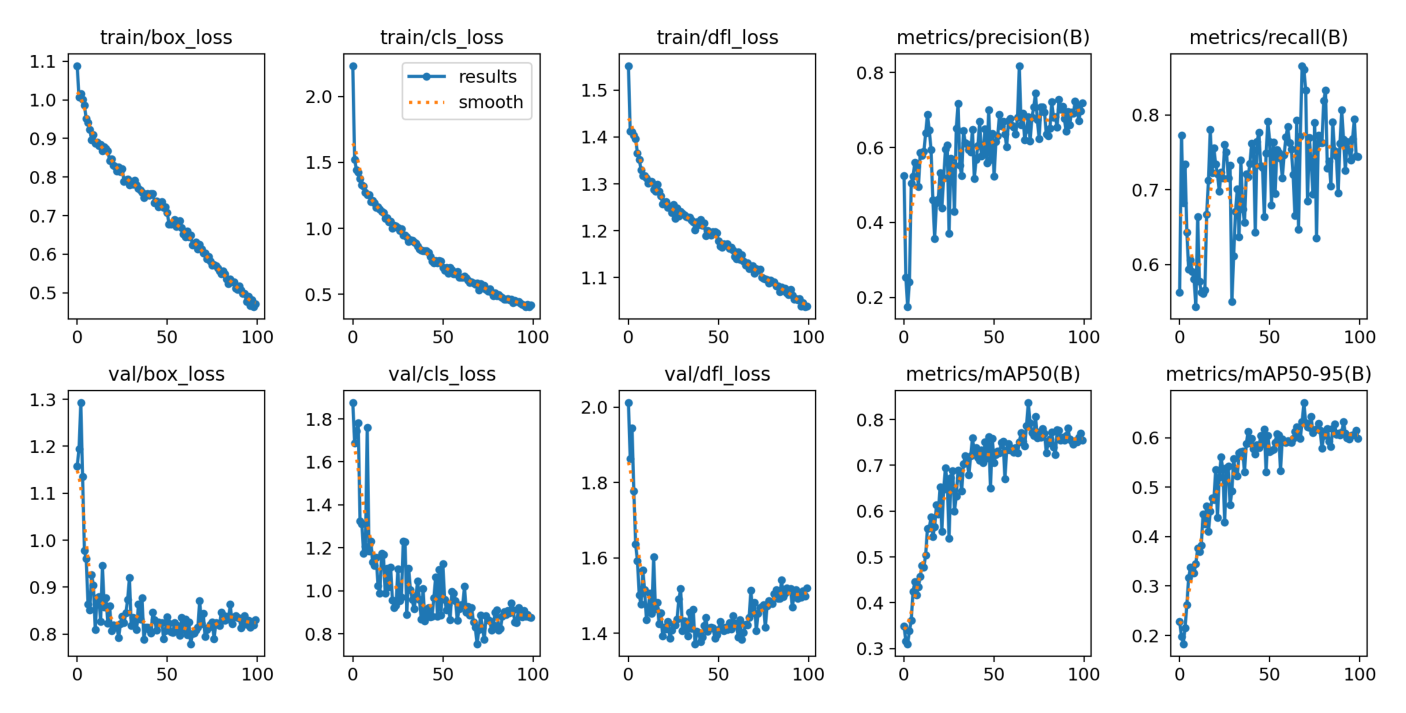

In [17]:
import matplotlib.pyplot as plt
from PIL import Image


# Specify the image file path
image_path = '../project-data/shape_results/results.png'

# Specify the desired size of the image in inches
width = 18
height = 9

# Load the image using PIL
image = Image.open(image_path)

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(width, height))

# Plot the image
ax.imshow(image)

# Remove the axis labels and ticks
ax.axis('off')

# Show the plot
plt.show()



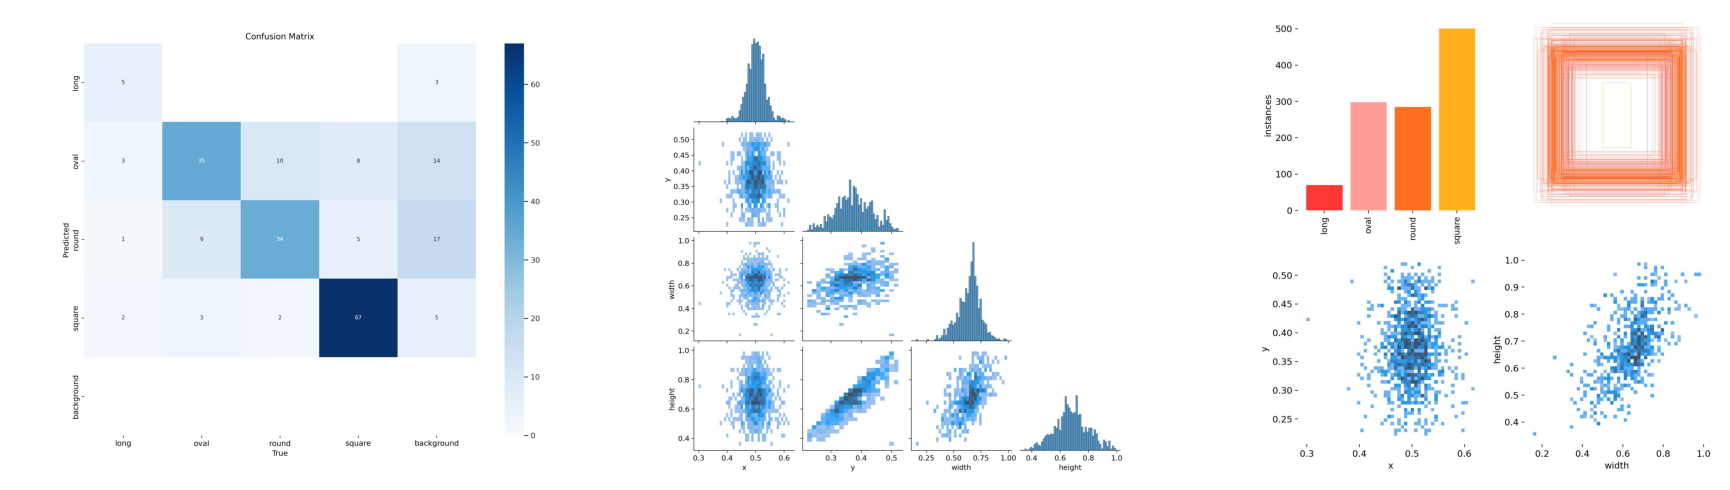

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# List of image file paths
image_paths = ['../project-data/shape_results/confusion_matrix.png', '../project-data/shape_results/labels_correlogram.jpg', '../project-data/shape_results/labels.jpg']

# Define the size of the displayed images
image_width = 6  # Width of each image in inches
image_height = 5  # Height of each image in inches

# Calculate the number of rows and columns based on the number of images
num_images = len(image_paths)
num_cols = 3  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the figure and subplots with the specified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * image_width, num_rows * image_height))

# Iterate over the images and display them in subplots
for i, ax in enumerate(axes.flat):
    # Check if there are more images than subplots
    if i < num_images:
        # Read and display the image
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with all the images
plt.show()

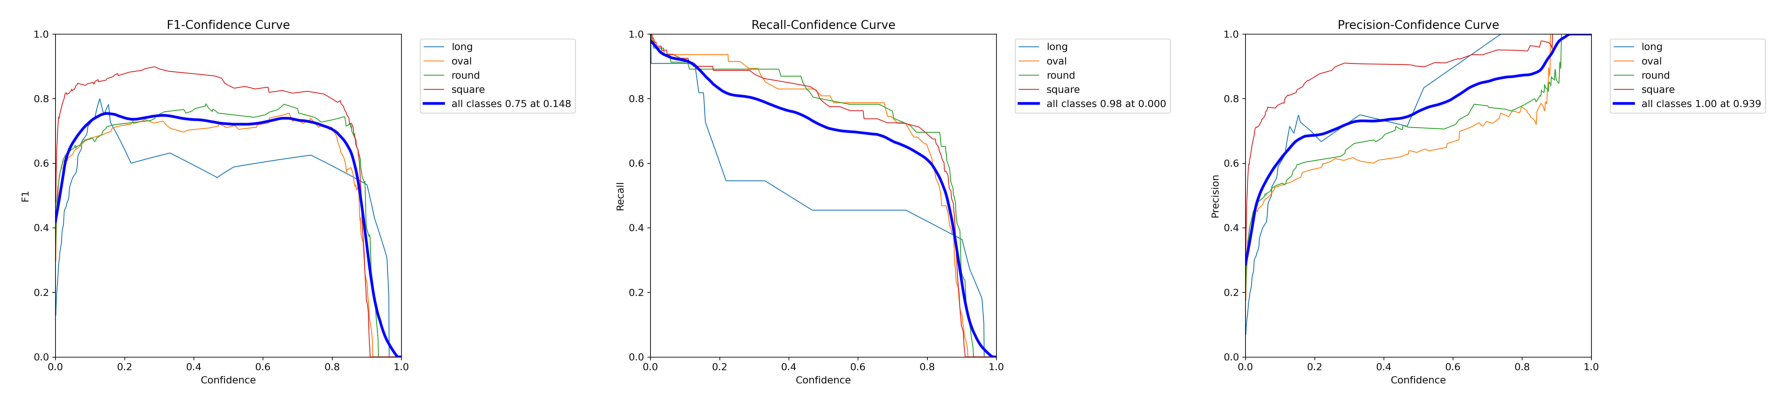

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# List of image file paths
image_paths = ['../project-data/shape_results/F1_curve.png', '../project-data/shape_results/R_curve.png', '../project-data/shape_results/P_curve.png']

# Define the size of the displayed images
image_width = 6  # Width of each image in inches
image_height = 5  # Height of each image in inches

# Calculate the number of rows and columns based on the number of images
num_images = len(image_paths)
num_cols = 3  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the figure and subplots with the specified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * image_width, num_rows * image_height))

# Iterate over the images and display them in subplots
for i, ax in enumerate(axes.flat):
    # Check if there are more images than subplots
    if i < num_images:
        # Read and display the image
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with all the images
plt.show()

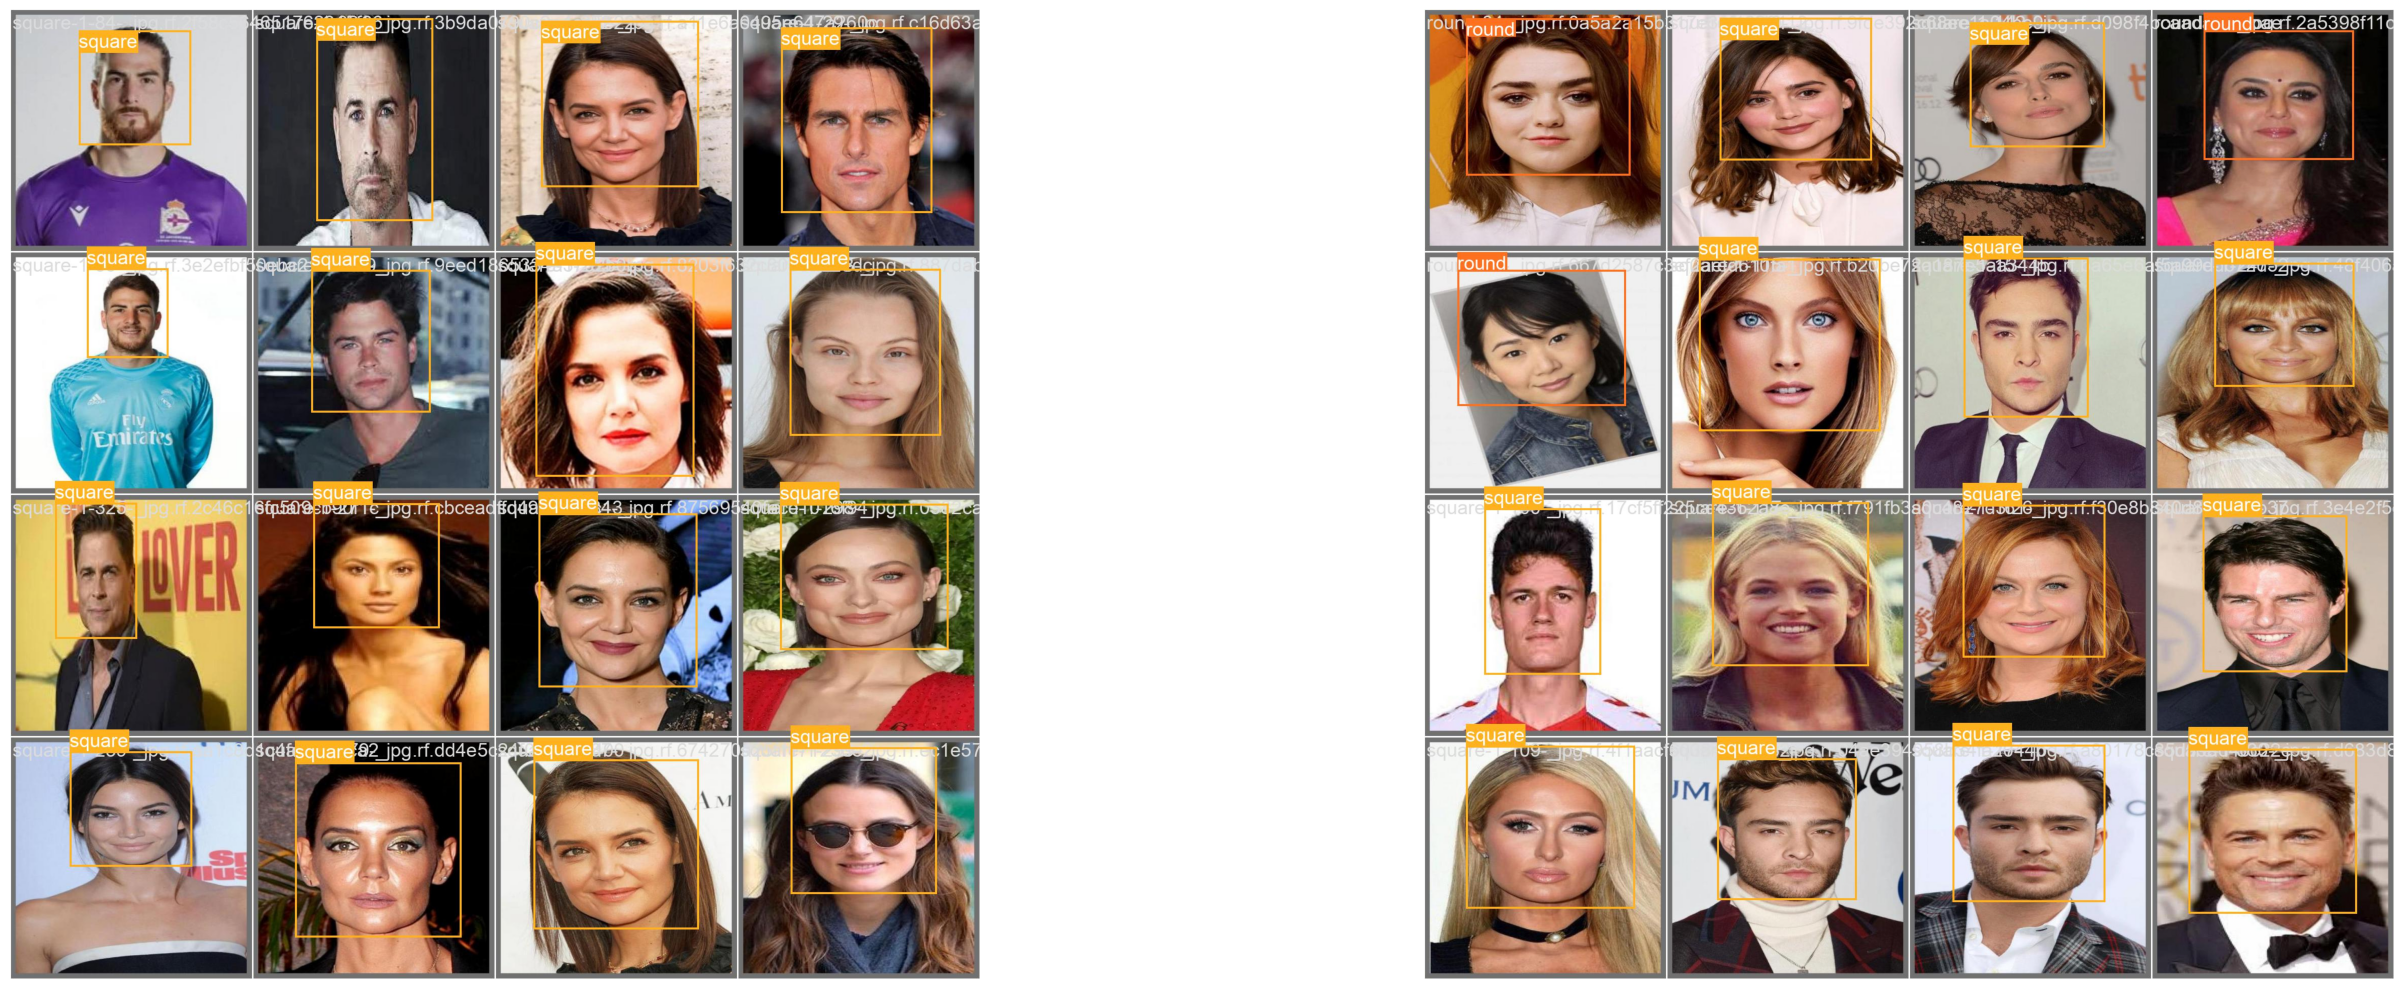

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# List of image file paths
image_paths = ['../project-data/shape_results/val_batch2_labels.jpg', '../project-data/shape_results/val_batch1_labels.jpg']

# Define the size of the displayed images
image_width = 16  # Width of each image in inches
image_height = 10  # Height of each image in inches

# Calculate the number of rows and columns based on the number of images
num_images = len(image_paths)
num_cols = 2  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the figure and subplots with the specified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * image_width, num_rows * image_height))

# Iterate over the images and display them in subplots
for i, ax in enumerate(axes.flat):
    # Check if there are more images than subplots
    if i < num_images:
        # Read and display the image
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with all the images
plt.show()

In [26]:
shape_model = yl("./utils/yolo-red.pt")
shape_model.predict(source = "./utils/img.jpg")
shape_model


image 1/1 c:\Users\Red\code\project\hair-model\utils\img.jpg: 384x640 1 oval, 302.8ms
Speed: 1.6ms preprocess, 302.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
